# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
PROJECT_ROOT_DIR = '.'
INSURANCE_PATH = os.path.join('datasets', 'insurance')

def fetch_housing_data(insurance_path=INSURANCE_PATH):
  if not os.path.isdir(insurance_path):
    os.makedirs(insurance_path)

fetch_housing_data()

In [ ]:
statinfo = os.path.getsize(os.path.join(INSURANCE_PATH, 'insurance.csv'))
print('File size: ' + str(statinfo) + "MB")

File size: 55628MB


In [ ]:
import pandas as pd

def loading_insurance_data(insurance_path=INSURANCE_PATH):
  csv_path = os.path.join(insurance_path, 'insurance.csv')
  return pd.read_csv(csv_path)

insurance = loading_insurance_data()

insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


There are 7 features: Age, Sex, BMI, Children, Smoker, Reggion, and Charges

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Number of Entires: 1338 |
Number of Missing Data Points: None |
Catagorial Data: Yes, Sex, Smoker, Region

Just form a glance, it looks like being a smoker and having more children leads to a higher charges. This could be from more test/care needed from smoking, and more aid neeced with mroe children.

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING (25 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
X_train = [];
y_train = [];
X_test = [];
y_test = [];

In [ ]:
insurance_data = insurance.copy()

corr_matrix = insurance_data.corr()
corr_matrix.shape

(4, 4)

In [ ]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2ce97b9e8>,
      dtype=object)

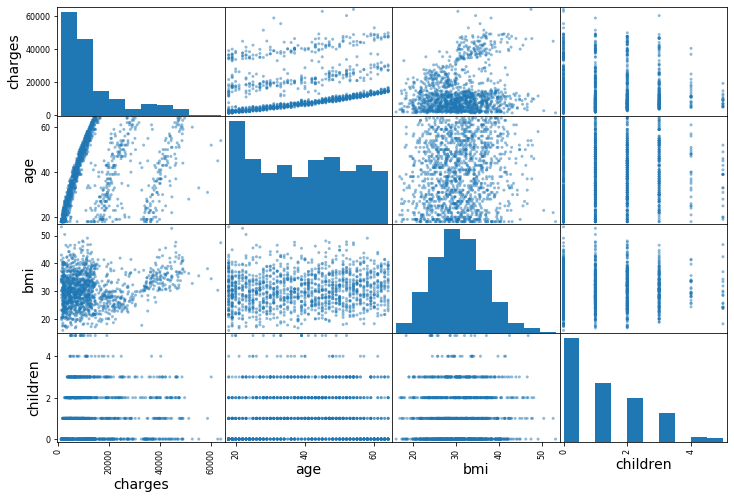

In [ ]:
attributes = ['charges', 'age', 'bmi', 'children']

scatter_matrix(insurance_data[attributes], figsize=(12,8))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(insurance_data.drop(['charges'], axis=1), insurance_data['charges'], test_size = 0.3, random_state=42)

In [ ]:
insurance_num = insurance.drop(['sex', 'smoker', 'region', 'charges'], axis=1)

In [ ]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
])

In [ ]:
cat_attr = (['sex', 'smoker', 'region'])
num_attr = list(insurance_num)

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipline = ColumnTransformer([
      ('num', num_pipeline, num_attr),
      ('cat', OneHotEncoder(), cat_attr),
])

X_train = full_pipline.fit_transform(X_train)
X_test = full_pipline.fit_transform(X_test)

In [ ]:
X_train.shape

(936, 11)

In [ ]:
y_train.shape

(936,)

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT (30 pts)
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [ ]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = np.random.rand(12); # parameter vector;
    self.alpha = 0.01; # learning rate
    self.cost  = 1000; # cost function
    self.cost_hist = []

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT: 
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here

    m = len(y_train)

    for i in range(iters):
      predictions = X_train.dot(self.theta)
      cost = (1/m) * (predictions - y_train).T.dot(predictions-y_train)
      self.cost_hist.append(cost)
    
      gradients = (2/m)* X_train.T.dot(X_train.dot(self.theta) - y_train)
      self.theta = self.theta - self.alpha * gradients
    
    return self.cost_hist


  def fitUsingGradientDescent(self, X_train, y_train, alpha):
    """
    Train the regressor using gradient descent
    """
    # implementation code here
    self.alpha = alpha
    return self.gradientDescent(X_train, y_train, self.theta, alpha, 100)

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.

    self.theta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here 
    y_predict = X_test.dot(self.theta)
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }

    return("Parameter vector i %f" % self.theta)
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
X_tr = np.c_[np.ones((len(y_train),1)), X_train] 
myGradientDescentModel.fitUsingGradientDescent(X_tr, y_train, 0.1)    
p1 = myGradientDescentModel.cost_hist
# myGradientDescentModel.fitUsingGradientDescent(X_tr, y_train, 0.00001)
# p2 = myGradientDescentModel.cost_hist
# myGradientDescentModel.fitUsingGradientDescent(X_tr, y_train, 0.0000001)
# p3 = myGradientDescentModel.cost_hist

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

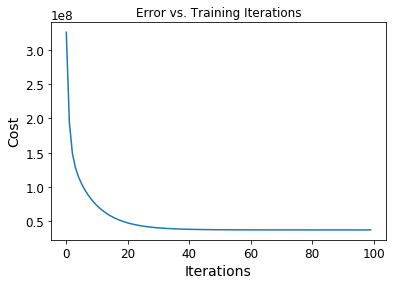

In [ ]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  
plt.plot(p1)

From the various plots I have played with, it seems that the graph becomes less of a curve and more of diagonal line as the leanring rate decimal becomes smaller and smaller

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [ ]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_tr, y_train)

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [ ]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

X_te = np.c_[np.ones((len(y_test),1)), X_test] 


y_predict = myGradientDescentModel.predict(X_te)
my_GD_mse = mean_squared_error(y_test, y_predict)
my_GD_rmse = np.sqrt(my_GD_mse)
print(my_GD_rmse)

y_predict = myNormalEquationModel.predict(X_te)
my_NM_mse = mean_squared_error(y_test, y_predict)
my_NM_rmse = np.sqrt(my_NM_mse)
print(my_NM_rmse)

5807.172088897348
5809.896859488707
5808.112093894943


- - -
## Task 6. PRESENT YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [ ]:
# Your paragraph goes here for this section

'''
From what it seems like, the custom Gradien Descent and Nornal equation we have progarmmed run very close to the stick sklearn model. A great
way to pitch the accuracy of these RMSE is to visually graph the out comes and overall states to show just how close the custom model runs to 
the base models within sklearn. If anything the small variation of the RMSE would most likely come from various float point error that tread 
throughout the code. Obviously the accuracy can really come down to a very specific learning rate that could get the RMSE closer to the stick model
in sklearn. As form what I learned, I guess it was interesting to see the model actually take into account the cost history to effectivly iterate
over till it got the best logical estimation. Also, I am not sure if it is just for this particular data set, but the Normal Equation was much easier 
to implement and did fractionally better than the Gradient Descent that I had implemented.
'''

'\nFrom what it seems like, the custom Gradien Descent and Nornal equation we have progarmmed run very close to the stick sklearn model. A great\nway to pitch the accuracy of these RMSE is to visually graph the out comes and overall states to show just how close the custom model runs to \nthe base models within sklearn. If anything the small variation of the RMSE would most likely come from various float point error that tread \nthroughout the code. Obviously the accuracy can really come down to a very specific learning rate that could get the RMSE closer to the stick model\nin sklearn. As form what I learned, I guess it was interesting to see the model actually take into account the cost history to effectivly iterate\nover till it got the best logical estimation. Also, I am not sure if it is just for this particular data set, but the Normal Equation was much easier \nto implement and did fractionally better than the Gradient Descent that I had implemented.\n'

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!